# Exploratory Data Analysis, Sentiment Analysis and Building Model For Text Data

In [1]:
# Built-in library
import itertools
import re
from typing import Any, Optional, Sequence, Union

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000


# Black code formatter (Optional)
%load_ext lab_black

> Data source is from **Kaggle**.

- The data can be found [here](https://www.kaggle.com/datasets/nenamalikah/nlp-ulta-skincare-reviews).

### Data Dictionary

```
- Review Title: The title of the review.
- Review_Text: The full text of the review.
- Verified_Buyer: Whether the reviewer is a verified buyer of the product.
- Review_Date: The date the review was published relative to the review scrape date.
- Review_Location: The location of the reviewer.
- Review_Upvotes: How many times the review was upvoted by other reviewers.
- Review_Downvotes: How many times the review was downvoted by other reviewers.
- Product: The name of the product the review was issued for.
- Brand: The brand of the product.
- Scrape Date: The date the data was pulled from the web.
```

### Objectives

```
1. Exploratory Data Analysis.

2. Research and experimentation.

3. Sentiments Analysis.

```

<br><hr>

###  Qs 1. Explore the data. What can the reviews tell us about the products? Do most buyers have common skincare issues? What issues did the products help solve or exacerbate?


In [5]:
# Reading the given data
df = pd.read_csv("Ulta Skincare Reviews.csv")
df.head()

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date
0,Perfect,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
1,You need this,Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
2,Clean skin,Enjoy this product so much ! I look forward to using it - really feels great.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
3,Love This Stuff!,I've never tried anything like this before and I love it. When you apply it to your face you get a little shot of warm that feels so good. The scrub seems very gritty but the only side effects I've encountered have been positive ones.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
4,This exfoliates very nicely and,"This exfoliates very nicely and gives a very smooth skin after with no irritation and no reaction to the skin . I highly recommended it, i will buy it again.",No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23


**This is the first five(5) rows of the table of the given data in pandas**

In [ ]:
# Checking the product column
df["Product"].unique()

array(['Multi-Vitamin Thermafoliant', 'Hydro Masque Exfoliant',
       'Daily Superfoliant', 'Daily Microfoliant'], dtype=object)

**Above I checked the variables of the product column in the data**

In [ ]:
# Checking for missing values in the data
df.isna().sum()

Review_Title        0
Review_Text         2
Verified_Buyer      0
Review_Date         0
Review_Location     1
Review_Upvotes      0
Review_Downvotes    0
Product             0
Brand               0
Scrape_Date         0
dtype: int64

**The data have some missing values in the Review_Text and Review_Location**

In [6]:
# Filing the missing values
df.fillna("NULL", inplace=True)

**I'm filling the missing values with NULL**

In [ ]:
# Checking for missing values in the data
df.isna().sum()

Review_Title        0
Review_Text         0
Verified_Buyer      0
Review_Date         0
Review_Location     0
Review_Upvotes      0
Review_Downvotes    0
Product             0
Brand               0
Scrape_Date         0
dtype: int64

**There are no more missing values in the Review_Text and Review_Location**

In [ ]:
# Checking the description summary of the dataset.
df.describe()

,Review_Upvotes,Review_Downvotes
count,4150.000000,4150.000000
mean,0.591325,0.161205
std,2.210041,0.912561
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,84.000000,35.000000


**Above I checked the mean, standard deviation,count, mininum and maximum value of the numeric columns in the dataset.**

In [7]:
# Dropping the unnecessary columns
col_to_drp = [
    "Review_Date",
    "Review_Location",
    "Brand",
    "Scrape_Date",
]
df.drop(columns=col_to_drp, inplace=True)
df.head()

,Review_Title,Review_Text,Verified_Buyer,Review_Upvotes,Review_Downvotes,Product
0,Perfect,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,No,0,0,Multi-Vitamin Thermafoliant
1,You need this,Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother,No,0,0,Multi-Vitamin Thermafoliant
2,Clean skin,Enjoy this product so much ! I look forward to using it - really feels great.,No,0,0,Multi-Vitamin Thermafoliant
3,Love This Stuff!,I've never tried anything like this before and I love it. When you apply it to your face you get a little shot of warm that feels so good. The scrub seems very gritty but the only side effects I've encountered have been positive ones.,No,0,0,Multi-Vitamin Thermafoliant
4,This exfoliates very nicely and,"This exfoliates very nicely and gives a very smooth skin after with no irritation and no reaction to the skin . I highly recommended it, i will buy it again.",No,0,0,Multi-Vitamin Thermafoliant


**I'm dropping the review date, review location, brand and scrape date columns.**

In [8]:
# Checking for duplicates
df.duplicated().sum()

459

**There are 459 duplicates in the dataset.**

In [9]:
# Dropping duplicates
df.drop_duplicates(inplace=True, keep="first")

**The duplicates have been dropped.**

In [10]:
# Dictionary of English Contractions
contractions_dict = {
    "ain't": "are not",
    "'s": " is",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "I'd": "I would",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "that'd": "that would",
    "that'd've": "that would have",
    "there'd": "there would",
    "there'd've": "there would have",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what've": "what have",
    "when've": "when have",
    "where'd": "where did",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who've": "who have",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have",
}

# Regular expression for finding contractions
contractions_re = re.compile("(%s)" % "|".join(contractions_dict.keys()))


# Function for expanding contractions
def expand_contractions(text, contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]

    return contractions_re.sub(replace, text)


# Expanding Contractions in the reviews
df["Review_Text"] = df["Review_Text"].apply(lambda x: expand_contractions(x))
df["Review_Title"] = df["Review_Title"].apply(lambda x: expand_contractions(x))

**Contractions are the shortened versions of words. These are used to reduce the speaking and writing time of words. I will be expanding these contractions for a better analysis of the reviews. Above, I have created a dictionary of common English contractions that I will use for mapping the contractions to their expanded forms and am using regular expressions to map the contractions.**

In [11]:
# converting text to lowercase
df["Cleaned_Review_Text"] = df["Review_Text"].apply(lambda x: x.lower())
df["Review_Title"] = df["Review_Title"].apply(lambda x: x.lower())

**I'm using the lower() function with lamda to convert the cleaned review text and review title text to lowercase.**

In [12]:
# Removing the digits and words with digit
df["Cleaned_Review_Text"] = df["Cleaned_Review_Text"].apply(
    lambda x: re.sub("\w*\d\w*", "", x)
)
df["Review_Title"] = df["Review_Title"].apply(lambda x: re.sub("\w*\d\w*", "", x))

**I am using regex and lambda to remove digits and words with digits as digit do not give much importance to the word.**

In [13]:
# Removing the punctuation marks
import string

df["Cleaned_Review_Text"] = df["Cleaned_Review_Text"].apply(
    lambda x: re.sub("[%s]" % re.escape(string.punctuation), " ", x)
)
df["Review_Title"] = df["Review_Title"].apply(
    lambda x: re.sub("[%s]" % re.escape(string.punctuation), " ", x)
)

**I am removing the punctuation marks using lamda and regex, as it have no importance on the analysis.**

In [14]:
# Removing extra spaces
df["Cleaned_Review_Text"] = df["Cleaned_Review_Text"].apply(
    lambda x: re.sub(" +", " ", x)
)
df["Review_Title"] = df["Review_Title"].apply(lambda x: re.sub(" +", " ", x))

**I am removing all the extra spaces in the text.**

In [16]:
import spacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")
stopwords = nlp.Defaults.stop_words

# Removing the stopwords and lemmatizing
df["Cleaned_Review_Text"] = df["Cleaned_Review_Text"].apply(
    lambda x: " ".join(
        [token.lemma_ for token in list(nlp(x)) if (token.is_stop == False)]
    )
)

df["Review_Title"] = df["Review_Title"].apply(
    lambda x: " ".join(
        [token.lemma_ for token in list(nlp(x)) if (token.is_stop == False)]
    )
)

**I am using spacy module to remove the stopwords and lemmatizing.**

In [17]:
# Grouping the product with the review text and title.
df_grouped = (
    df[["Product", "Review_Title", "Cleaned_Review_Text"]]
    .groupby(by="Product")
    .agg(lambda x: " ".join(x))
)
df_grouped.head()

,Review_Title,Cleaned_Review_Text
Product,,
Daily Microfoliant,purchase exfoliate worth love stuff amazing good purge great product wonder don t love new favorite work definitely recommend perfect addition skincare routine expensive love holy grail work good buy time staple skincare routine wow pretty good worth cost recommend year buy product skin feel soft use good exfoliate product amazing gentle help uneven skin yasss buy don t waste money new love texture flawless base holy grail status micro cut enjoy year improve skincare nice daily exfoliant careful exfoliate love product powder hook use amazing add skin routine absolutely buy love product exfoliate product great exfoliator irritate skin daily use love good sensitive skin use moderately sorry buy product good period special help clear skin need yes yes yes amazing buy time time want love product gentle exfoliant look incredible horrible reaction blah love soft exfoliant wonderful great exfoliator love love buy love great caveat … exfoliate exfoliation game love magic continue buy...,recently notice appearance blackhead month normally past try exfoliate product zero change appearance try time notice major difference time try return purchase run buy notice change skin product smell like powder milk product content weight come moisture absorbent packet find inside good scrub tacha rice polish comparable r scrub use use tiny bit mix water scrub leave skin soft ready skincare routine african american natural product lush product address issue like beautiful skin come night product great patience purge skip start week ago week skin break bad assumption exfoliate gunk underneath skin barrier week great result small blemish pore small forehead nose excited skin look like week amazing product struggle acne scar year product diminish away cleanser moisturizer clay mask product dermalogica change skin life finally feel comfortable skin la roche posay cleanser vitamin c oil wonder skin exfoliator oil week notice huge difference skin dark spot lighten texture skin lot smoo...
Daily Superfoliant,sure holy grail cleanser little gord long like favorite cleanser wonderful product face thank worth penny love item perfect clean dry sensitive skin love buy great smooth skin love gentle love exfoliant love product creamy hydrate moisturize product work use day soft skin pleasantly surprise like wash face fireplace ashe face clear skin cleanser work great precleanse cleanser love feel intensive moisture cleanser staple sferrone chronically dry skin great flaky sensitive skin great combat winter weather daily superfoliant work love heart ï¸ smooth feel item clean dry excellent intensive moisturizing wash work powder exfoliate soap good exfoliator help break perfect product suitable sensitive skin travel bag fan cream cleanser stuff great usually use microfolient love exfoliant gentle exfoliant love exfoliator love intensive moisture cleanser clean dry tighten smooth skin great physical chemical exfoliant buy dry skn love product love daily clean smell love recommend product fav...,buy whim store great review description multiple time great remove impurity wash twice ton makeup come toner hydrate guess moderately dry skin yeat long mean cleanser immediately dry expensive product drug store product clean balm year feel face clean twice sit worried try omg shock like regular cleanser rub rinse room temp water feel immediately moisturize face feel light airy clean little gord long way value amazing exfoliant incredible gentle use day skin feel like blank canvas moisturize like esthetician recommend product series chemical peel absolutely love product sensitive combo skin hydration moisture face feel amazing definitely feel remove dirt day highly recommend fellow combo skin peep finally moisturize cleanser clean moisturize expect product clean moisturize time face red blotchy look wash great product spot change essential step daily skincare routine try skin cleanser cake light weight job strip s

**I am grouping each product with the review title and text, showing the cleaned columns.**

In [19]:
# Checking the most common words
from collections import Counter

most_common = Counter(df["Cleaned_Review_Text"]).most_common(20)
most_common

[('love', 22),
 ('great product', 11),
 ('love product', 8),
 ('great', 5),
 ('good product', 3),
 ('skin feel soft smooth', 3),
 ('receive free sample ￼ ulta gift purchase goodie bag ￼ hook use travel away couple day want pack clarisonic carry love large size allow environmentally friendly refill skin smooth tone time use ￼',
  3),
 ('use morning', 3),
 ('absolutely love', 2),
 ('excelent', 2),
 ('awesome', 2),
 ('face feel smooth', 2),
 ('super', 2),
 ('leave skin soft smooth love gentle warming sensation', 2),
 ('skin feel soft', 2),
 (' ', 2),
 ('absolutely love product', 2),
 ('wonderful product daily skin care routine', 2),
 ('wonderful product', 2),
 ('amazing product', 2)]

**I am listing out the 20 most common words in the cleaned review text, showing that most of the buyers love the products.**

In [20]:
# Checking the most common words
most_common_1 = Counter(df["Review_Title"]).most_common(20)
most_common_1

[('love', 294),
 ('great product', 90),
 ('amazing', 89),
 ('love product', 88),
 ('', 68),
 ('buy', 58),
 ('buy product', 58),
 ('good', 52),
 ('good product', 33),
 ('amazing product', 29),
 ('great', 27),
 ('great exfoliant', 23),
 ('gentle effective', 22),
 ('favorite', 21),
 ('work', 20),
 ('exfoliant', 17),
 ('love love love', 17),
 ('awesome', 16),
 ('nice', 15),
 ('love exfoliant', 14)]

**I am listing out the 20 most common words in the review title, showing that most of the buyers love the products.**

In [ ]:
# Appending the words and frequently occured of the words in the cleaned review text
words = []
freq = []
for word, count in most_common:
    words.append(word)
    freq.append(count)

In [ ]:
# Appending the words and frequently occured of the words in the review title
words_1 = []
freq_1 = []
for word, count in most_common_1:
    words_1.append(word)
    freq_1.append(count)

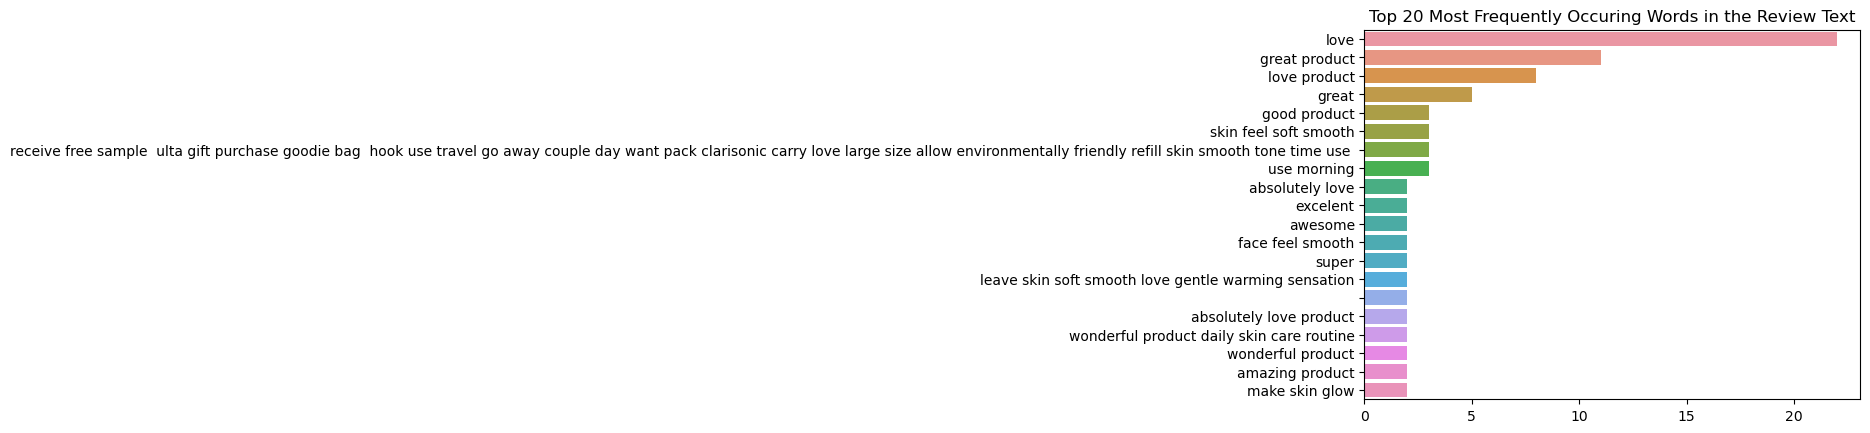

In [ ]:
# Plotting a barplot of the 20 most common words in the cleaned review text
sns.barplot(x=freq, y=words)
plt.title("Top 20 Most Frequently Occuring Words in the Review Text")
plt.show()

**I am plotting a barplot of 20 of the most common words in the cleaned review text, this reviews show that most of the buyers like the product they bought.** 

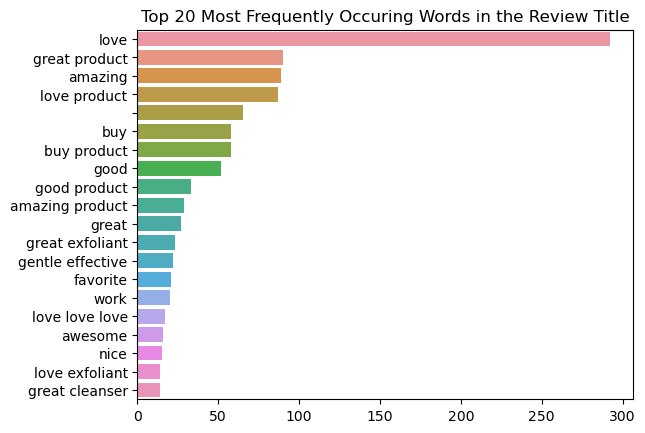

In [ ]:
# Plotting a barplot of the 20 most common words in the review title
sns.barplot(x=freq_1, y=words_1)
plt.title("Top 20 Most Frequently Occuring Words in the Review Title")
plt.show()

**I am plotting a barplot of 20 of the most common words in the review title, this reviews show that most of the buyers like the product they bought.** 

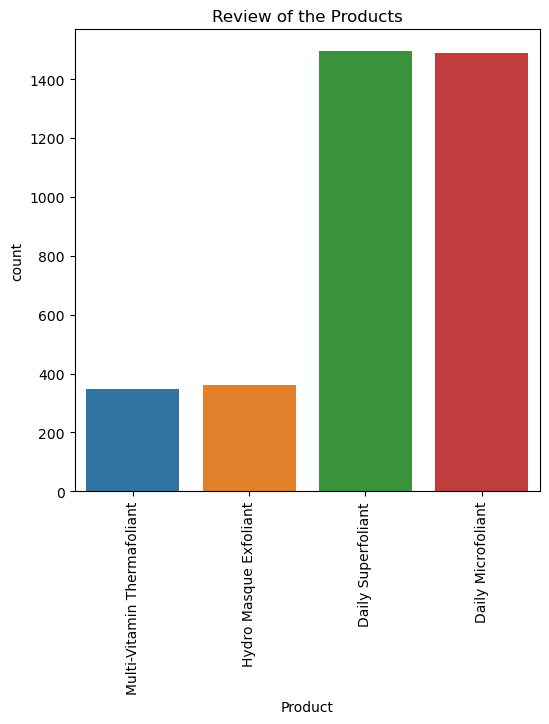

In [ ]:
plt.figure(figsize=(6, 6))
sns.countplot(x=df["Product"])
plt.xticks(rotation=90)
plt.title("Review of the Products")
plt.show()

**I am plotting a countplot graph showing the review count of the buyers on each product, showing that daily microfoliant and daily superfoliant are the 2 of the 4 products having more reviews than the multi-vitamin thermafoliant and hydro masque exfoliant products having the less reviews.** 

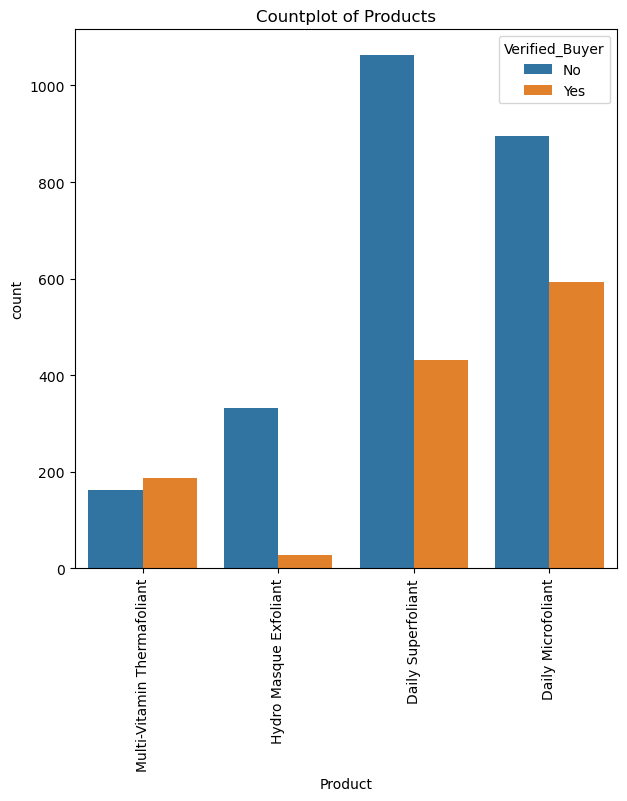

In [ ]:
# Plotting a countplot of the verified buyers
plt.figure(figsize=(7, 7))
sns.countplot(x=df["Product"], hue=df["Verified_Buyer"])
plt.xticks(rotation=90)
plt.title("Countplot of Verified buyers Products")
plt.show()

**I am plotting a countplot graph of the verified buyers, counting the review of the verified buyers and non-verified buyers on each product, showing that the non-verified buyers have more reviews than the verified buyers on the hydro masque exfoliant, daily superfoliant and daily microfoliant products and the verifiend buyers only have more reviews than the non-verified buyers on the multi-vitamin thermafoliant product.**

###  Qs 2. Create a wordcloud showing the words/phrases commonly associated with each product.

In [ ]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

**Importing the neccessary modules**

In [ ]:
text_1 = " ".join(review for review in df.Cleaned_Review_Text)
print(
    "There are {} words in the combination of all the review text after lemmatizing.".format(
        len(text_1)
    )
)

There are 480696 words in the combination of all the review text after lemmatizing.


**In the cell above I'm joining and counting the words in the cleaned review text column** 

In [ ]:
df.Product.unique()

array(['Multi-Vitamin Thermafoliant', 'Hydro Masque Exfoliant',
       'Daily Superfoliant', 'Daily Microfoliant'], dtype=object)

**Checking the product column variables**

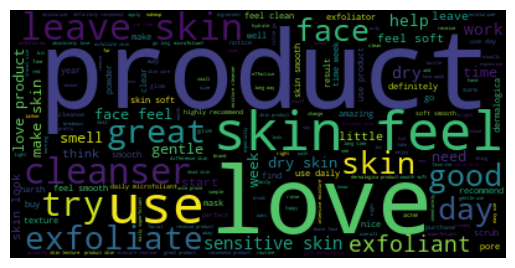

In [ ]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(
    [
        "Multi-Vitamin Thermafoliant",
    ]
)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text_1)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

**I created a wordcloud showing product, skin, use, good, feel and love as the commonly used words associated to the Multi-Vitamin Thermafoliant product**

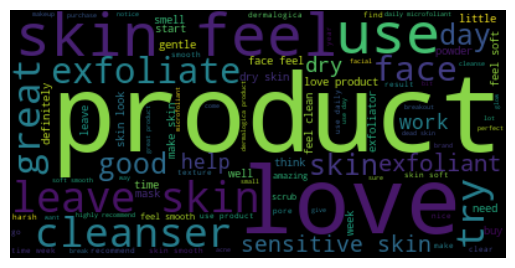

In [ ]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(
    [
        "Hydro Masque Exfoliant",
    ]
)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text_1)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

**I created a wordcloud showing love, use, product, skin and feel as the commonly used words associated to the Hydro Masque Exfoliant product**

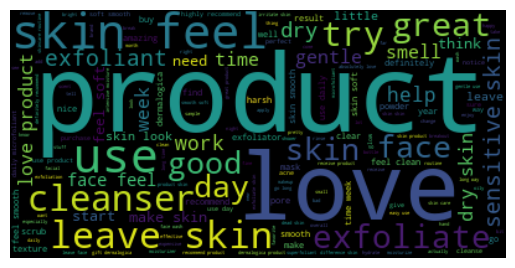

In [ ]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(
    [
        "Daily Superfoliant",
    ]
)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text_1)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

**I created a wordcloud showing use, love, product, skin and feel as the commonly used words associated to the Daily Superfoliant product**

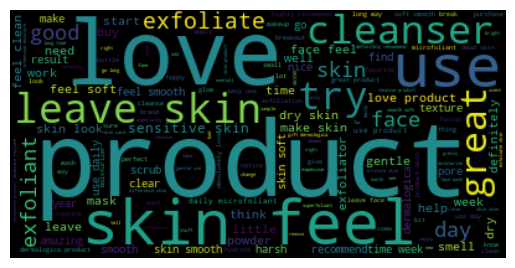

In [ ]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(
    [
        "Daily Microfoliant",
    ]
)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text_1)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

**I created a wordcloud showing skin, love, feel, cleanser, product and leave as the commonly used words associated to the Daily Microfoliant product**

### Qs 3. Perform sentiment analysis. Build a ML model that can predict whether a review is positive or negative.

In [ ]:
# Checking the table again and showing the first 5 rows.
df.head()

,Review_Title,Review_Text,Verified_Buyer,Review_Upvotes,Review_Downvotes,Product,Cleaned_Review_Text
0,perfect,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,No,0,0,Multi-Vitamin Thermafoliant,love face shower heat give light scrub nicely
1,need,Even better than the daily microfoliant. I am obsessed. My skin is SO MUCH smoother,No,0,0,Multi-Vitamin Thermafoliant,well daily microfoliant obsess skin smooth
2,clean skin,Enjoy this product so much ! I look forward to using it - really feels great.,No,0,0,Multi-Vitamin Thermafoliant,enjoy product look forward feel great
3,love stuff,I have never tried anything like this before and I love it. When you apply it to your face you get a little shot of warm that feels so good. The scrub seems very gritty but the only side effects I have encountered have been positive ones.,No,0,0,Multi-Vitamin Thermafoliant,try like love apply face little shot warm feel good scrub gritty effect encounter positive one
4,exfoliate nicely,"This exfoliates very nicely and gives a very smooth skin after with no irritation and no reaction to the skin . I highly recommended it, i will buy it again.",No,0,0,Multi-Vitamin Thermafoliant,exfoliate nicely give smooth skin irritation reaction skin highly recommend buy


In [22]:
# Importing modules
import transformers
from transformers import pipeline

**To perform any task using transformers, we first need to import the pipeline function from transformers and am doing that in the above cell.**

In [23]:
# Creating the object of the pipeline.
sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


**The object of the pipeline function is created.**

In [53]:
# the task to be performed is passed as an argumen
data = list(df['Cleaned_Review_Text'])
Rev_text_sent_anly = sentiment_pipeline(data)
Rev_text_sent_anly

[{'label': 'POSITIVE', 'score': 0.9996335506439209},
 {'label': 'POSITIVE', 'score': 0.9917005896568298},
 {'label': 'POSITIVE', 'score': 0.9948499798774719},
 {'label': 'POSITIVE', 'score': 0.9987994432449341},
 {'label': 'POSITIVE', 'score': 0.9863787889480591},
 {'label': 'POSITIVE', 'score': 0.979900062084198},
 {'label': 'POSITIVE', 'score': 0.7126379609107971},
 {'label': 'NEGATIVE', 'score': 0.8657093644142151},
 {'label': 'NEGATIVE', 'score': 0.9864534735679626},
 {'label': 'NEGATIVE', 'score': 0.9866633415222168},
 {'label': 'POSITIVE', 'score': 0.9990392923355103},
 {'label': 'NEGATIVE', 'score': 0.5949151515960693},
 {'label': 'POSITIVE', 'score': 0.9997022747993469},
 {'label': 'POSITIVE', 'score': 0.9801953434944153},
 {'label': 'POSITIVE', 'score': 0.9667496085166931},
 {'label': 'POSITIVE', 'score': 0.9965325593948364},
 {'label': 'NEGATIVE', 'score': 0.9882778525352478},
 {'label': 'POSITIVE', 'score': 0.9982117414474487},
 {'label': 'NEGATIVE', 'score': 0.9783065915107

**The task to be performed was passed as an argument and the sentiment analysis was performed above.**

In [54]:
# Creating a dataframe for the sentiment analysis performed  
Text_sent_df = pd.DataFrame(Rev_text_sent_anly)
Text_sent_df

,label,score
0,POSITIVE,0.999634
1,POSITIVE,0.991701
2,POSITIVE,0.994850
3,POSITIVE,0.998799
4,POSITIVE,0.986379
...,...,...
3316,POSITIVE,0.999889
3317,POSITIVE,0.997306
3318,POSITIVE,0.999855
3319,POSITIVE,0.981971


**I put the analysed result in a dataframe and showing the first 5 rows and last five rows out of 3321 rows of the dataframe.**

In [55]:
# Grouping the analysed label result
Lab_sent_count = Text_sent_df.groupby(['label']).size()
print(Lab_sent_count)

label
NEGATIVE    1077
POSITIVE    2244
dtype: int64


**I'm grouping the analysed result and counting negative to be 1077 and positive to be 2244.**

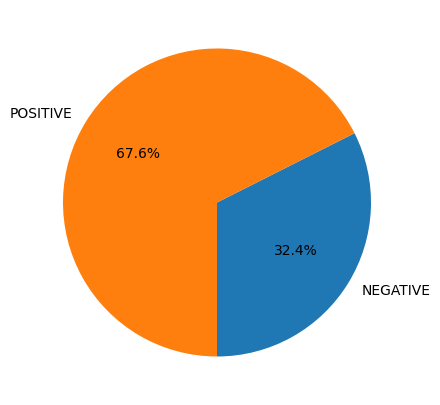

In [56]:
# Creating a pie chart plot for the analysed result
fig = plt.figure(figsize=(5,5), dpi=100)
AX = plt.subplot(111)
Lab_sent_count.plot.pie(ax=AX, autopct='%1.1f%%', startangle=270, fontsize=10, label="")
plt.show()

**Above is the pie chart of the analysed result, showing the percentage of positive to be 67.6% and negative to be 32.4%.** 

In [57]:
# Splitting into train and test
from sklearn.model_selection import train_test_split

# Target
TARGET = "label"
TEST_SIZE = 0.1
RANDOM_STATE = 123

X = df["Cleaned_Review_Text"]
y = Text_sent_df[TARGET]

# Split data
X_train, x_validate, y_train, y_validate = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE
)

X_train.shape, x_validate.shape

((2988,), (333,))

In [58]:
# Checking the split X_train
X_train.head()

3012    complimentary dermalogica product extremely strong recommend mix strong product contain exfoliant ingredient people color advise
266                                                                                   result use redness greatly deminishe skin smoother
705                                                                                                                 work great skin type
1664                                                                                                                      good face wash
2405        product month real difference skin skin dry prone break area skin smooth hardly breakout definitely rebuy plus smell amazing
Name: Cleaned_Review_Text, dtype: object

In [59]:
# Checking the split y_train
y_train.head()

3221    POSITIVE
257     POSITIVE
627     POSITIVE
2828    POSITIVE
15      POSITIVE
Name: label, dtype: object

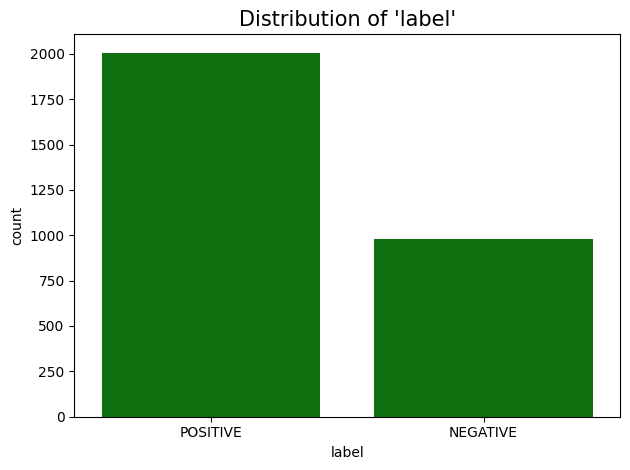

In [60]:
# Plotting a countplot of the analysed result
df = pd.concat([X_train, y_train], axis="columns")

# Distribution of the target. It is fairly balanced.
sns.countplot(x=TARGET, data=df, color="g")
plt.title(f"Distribution of {TARGET!r}", size=15)
plt.tight_layout()
plt.show()

**I plot the countplot of the analysed result checking the distribution of the label, showing the labels are imbalanced.**

In [61]:
# Preprocess the text
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

# Counting the words
X_tr_new = vectorizer.fit_transform(X_train)
X_val = vectorizer.transform(x_validate)

X_tr_new 

<2988x3397 sparse matrix of type '<class 'numpy.int64'>'
	with 50345 stored elements in Compressed Sparse Row format>

**The text are preprocess using count vectorizer module and 50345 words are stored.**

In [64]:
# Train the model
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_tr_new, y_train)

# Check the accuracy
train_accuracy = nb_model.score(X_tr_new, y_train)
val_accuracy = nb_model.score(X_val, y_validate)

print(f"Train accuracy: {train_accuracy:.3f}")
print(f"Test accuracy: {val_accuracy:.3f}")

Train accuracy: 0.869
Test accuracy: 0.763


**The model was built using multinominalNB and a test accuracy of 0.76 score was gotten.**

# CONCLUSION:

* Customers love products from Ulta Skincare. They find them a great purchase and easy to use
* Ulta Skincare needs to work on Multi-Vitamin Thermafoliant and Hydro Masque Exfoliant because it has the most least reviews and least recommended product
* After generating the world cloud(most common words) on each product, we can see Love, Product and Skin out of the most common words, showing that the buyers love the product on there skin
* The sentiment analysis show the positive and negetavie reviews, showing that there are more positive reviews than negative reviews
* The majority of reviews are written in simple English and are easily understandable by anyone who has 5th or 6th grade of school